### 가져올것
- 평점, 리뷰날짜, 리뷰, 아이디


In [1]:
import requests
from bs4 import BeautifulSoup as bs

In [155]:
url='https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=163834&type=after&page='
html=requests.get(url+str(1))
soup=bs(html.content,'html.parser')


In [156]:
total=soup.find('div',class_='score_total').find('em').getText().replace(',','')
int(total)

4173

### 알아두세요
- getText(): 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- .text 속성: 하위 자식태그의 텍스트까지 문자열로 반환(유니코드 형식)
- .string 속성: .string 태그 하위에 문자열을 객체화, 문자열이 없으면 None을 반환

In [157]:
score=soup.find('div',class_='star_score').find('em').getText()
int(score[0])

1

In [158]:
#기본 리뷰 가져오기
socre_re=soup.find('div',class_='score_result')
com_lst=socre_re('li')
# com_lst[0]
review_text=com_lst[0].find('p').getText().replace('\n','').replace('\t','').replace('\r','')
if review_text[:3]=='관람객':
    review_text=review_text[3:]
review_text


'B급 이하전편보다 퇴보된 CG, 중구난방식 연출, 러닝타임 늘리기 위한 쓸모없는 컷, 부족한 액션, 영화가 주는 시사점도 없고 보는 내내 오그라들고 나가고싶었음. '

In [159]:
#리뷰 기본 및 확장에 따라 데이터 가져오기
for i in range(len(com_lst)):
    try:
        review_text = com_lst[i].find('p').find('a')['data-src']

        
    except:
        review_text=com_lst[i].find('p').getText().replace('\n','').replace('\t','').replace('\r','')
    if review_text[:3]=='관람객':
        review_text=review_text[3:]

    print(review_text)
    print()


B급 이하전편보다 퇴보된 CG, 중구난방식 연출, 러닝타임 늘리기 위한 쓸모없는 컷, 부족한 액션, 영화가 주는 시사점도 없고 보는 내내 오그라들고 나가고싶었음. 

이딴 영화가 평점 8점 후반대라는 게 믿기지 않는다. 역시 네이버 평점은 믿고 걸러야 한다.개연성 중요하게 생각하는 사람들은 보면서 토할 수도 있으니까 조심.중후반부터 느금마사급 전개가 계속 이어지기 때문에 정신잡기 힘들 거임.제발 1편만큼만 해라라는 생각으로 봤는데 1편 발까락 때도 못따라감. 

역시 원더우먼 영화는 주연배우 갤가돗과 크리스파인이 다 살리네.. 감독은 확실히 영화 못 찍음.... 예전 샤를리즈 테론 영화 몬스터만해도 배우가 다 살림... 원더우먼 1도 악당 허술하고 매력없고 스토리도 전개가 뒤로 갈수록 허술하더니 크리스파인의 명대사로 살렸는데.. 이번 2도 에휴... 역시나 악역 허술 전개도 뒤로 갈수록 허술..결말은 1탄보다 더 허술.. 난 중간에 영화 캣츠 보는 줄 ㅋㅋㅋㅋ웃겨 죽는 줄 알았다.. 그나마 크리스파인과 갤가돗의 사랑내용과 원더우먼이 전하는 세상의 아름다움과 진실 이런 내용이 좀 감동적이엇음 슬펐고 .. 한스 짐머 음악도 이번엔 딱히 임팩트 있음을 못 느낌.. 액션도 완전 실망... 

진짜 개노잼이다.. 1편이랑 같은 감독맞나?러닝타임도 길어서 개지루함 ㄹㅇ 

스포일러가 포함된 감상평입니다. 감상평 보기히어로물의 액션을 기대했음. 그러나 졸렬한 액션과 이상한 전개로 마지막 영화관을 나설 때 신파극을 본 건지, 액션 영화를 본 건지, 로맨스를 본 건지, 코미디를 본 건지 알 수가 없음. 그놈의 채찍은 싸움때마다 꼭 ...

전작에 비해 별루내요 너무 기대를 한건지 

원더우먼이 날아가는 순간 CG는 너무 조악해서 실소가 나올 정도였다.삼류 스토리. 개연성없는 전개. 디씨가 왜 디씨로 머무르는지 한계를 보여주는 작품 

음 빌런 두 명 다 약하다 왤케 허무함..버오프도 그렇고...DC는 빌런을 강화시킬 필요가 있음... 

배경이 1984년이어서일까요?아님 DC

In [160]:
#평점 가져오기
review_score=com_lst[0].find('div',class_='star_score').find('em').text
int(review_score)

1

In [161]:
#날짜 가져오기
from datetime import datetime
review_date=com_lst[0].find('dt').find_all('em')[1].text
review_date=datetime.strptime(com_lst[0].find('dt').find_all('em')[1].text,'%Y.%m.%d %H:%M' )
review_date

datetime.datetime(2020, 12, 24, 9, 8)

In [162]:
#id가져오기
review_id=com_lst[0].find('dt').find_all('em')[0].text.replace('\n','')
review_id

'코꾸뇨우옹(pott****)'

In [302]:
#날짜, id, 리뷰, 평점
import requests
from bs4 import BeautifulSoup as bs
from datetime import datetime
import pandas as pd

url1='https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code='
url2='&type=after&page='
code=int(input('코드를 입력하세요: '))
pg=1000

url=url1+str(code)+url2
#기본 리뷰 가져오기


review=[]
cnt=0

for i in range(1,pg):
    
    #리뷰 가져오기
    html=requests.get(url+str(i))
    soup=bs(html.content,'html.parser')

    socre_re=soup.find('div',class_='score_result')
    com_lst=socre_re('li')
    
    score=soup.find('div', class_="score_total").find('em').getText()
    score=int(score.replace(',',''))
    
    for j in range(10):
        cnt+=1
        try:
            review_text = com_lst[j].find('p').find('a')['data-src']

        except:
            review_text=com_lst[j].find('p').text.replace('\n','').replace('\t','').replace('\r','')
            if review_text[:3]=='관람객':
                review_text=review_text[3:]

        #평점 
        review_score=int(com_lst[j].find('div',class_='star_score').find('em').text)

        #날짜
        review_date=com_lst[j].find('dt').find_all('em')[1].text
        review_date=datetime.strptime(com_lst[j].find('dt').find_all('em')[1].text,'%Y.%m.%d %H:%M' )

        #id
        review_id=com_lst[j].find('dt').find_all('em')[0].text.replace('\n','')
        review.append({'날짜':review_date,'id':review_id,'평점':review_score,'리뷰':review_text})
        
        if cnt==score:
            break
            
    if cnt==score:
        break
df=pd.DataFrame(review)
display(df.head())
df.to_csv('d:/py_data/네이버영화평점_#원더우먼.csv',index=False)


코드를 입력하세요: 163834


,날짜,id,평점,리뷰
0,2020-12-24 09:08:00,코꾸뇨우옹(pott****),1,"B급 이하전편보다 퇴보된 CG, 중구난방식 연출, 러닝타임 늘리기 위한 쓸모없는 컷..."
1,2020-12-23 22:19:00,juum****,3,이딴 영화가 평점 8점 후반대라는 게 믿기지 않는다. 역시 네이버 평점은 믿고 걸러...
2,2020-12-23 17:05:00,없음(jymi****),6,역시 원더우먼 영화는 주연배우 갤가돗과 크리스파인이 다 살리네.. 감독은 확실히 영...
3,2020-12-23 22:51:00,민중의빠따(gkst****),2,진짜 개노잼이다.. 1편이랑 같은 감독맞나?러닝타임도 길어서 개지루함 ㄹㅇ
4,2020-12-23 13:34:00,시리우스(sojh****),1,스포일러가 포함된 감상평입니다. 감상평 보기히어로물의 액션을 기대했음. 그러나 졸렬...


### 형태소 분석


In [305]:
from konlpy.tag import Okt
import nltk
review_txt=''
for txt in df['리뷰']:
    review_txt+=txt
okt=Okt()
noun_txt=okt.nouns(review_txt)
pos_txt=okt.pos(review_txt)
noun_ko=nltk.Text(noun_txt)
print(noun_ko)

<Text: 급 이하 전편 퇴보 중구 방식 연출 러닝...>


In [313]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
stop_words=['영화','평','것','원더우먼','짱','급','내내','점도','점']
word_txt=[txt for txt in noun_txt if txt not in stop_words]
word_txt

cnt=Counter(word_txt)
cnt

Counter({'이하': 31,
         '전편': 73,
         '퇴보': 10,
         '중구': 18,
         '방식': 6,
         '연출': 192,
         '러닝': 48,
         '타임': 59,
         '위': 41,
         '컷': 8,
         '액션': 629,
         '시사': 6,
         '평점': 141,
         '후반': 49,
         '게': 43,
         '역시': 95,
         '네이버': 9,
         '개연': 166,
         '생각': 265,
         '사람': 169,
         '토': 7,
         '수도': 11,
         '조심': 1,
         '중후': 9,
         '반': 29,
         '느금': 1,
         '마사': 4,
         '전개': 92,
         '계속': 37,
         '때문': 73,
         '정신': 8,
         '잡기': 1,
         '거임': 5,
         '제발': 39,
         '편': 282,
         '해': 27,
         '라라': 1,
         '발까락': 1,
         '때': 127,
         '주연': 16,
         '배우': 128,
         '돗': 354,
         '크리스': 51,
         '감독': 223,
         '못': 84,
         '예전': 12,
         '샤를': 1,
         '리즈': 2,
         '테론': 1,
         '몬스터': 1,
         '만해': 14,
         '살림': 2,
         '도': 101,
       

In [314]:
rank_cnt=cnt.most_common()
rank=[]
for (word,cnt) in rank_cnt:
    if cnt>10:
        rank.append((word,cnt))
rank
        

[('액션', 629),
 ('스토리', 572),
 ('감상', 506),
 ('진짜', 375),
 ('히어로', 374),
 ('돗', 354),
 ('보기', 299),
 ('편', 282),
 ('볼', 278),
 ('생각', 265),
 ('이', 259),
 ('그냥', 259),
 ('더', 241),
 ('포함', 241),
 ('시간', 238),
 ('스포일러', 235),
 ('감독', 223),
 ('왜', 213),
 ('정말', 201),
 ('빌런', 193),
 ('연출', 192),
 ('기대', 189),
 ('보고', 185),
 ('좀', 184),
 ('감동', 182),
 ('정도', 180),
 ('돈', 174),
 ('최악', 171),
 ('사람', 169),
 ('마블', 169),
 ('개연', 166),
 ('장면', 165),
 ('연기', 163),
 ('물', 155),
 ('느낌', 154),
 ('재미', 150),
 ('거', 149),
 ('평점', 141),
 ('말', 141),
 ('나', 139),
 ('내', 138),
 ('소원', 135),
 ('배우', 128),
 ('별로', 128),
 ('수', 128),
 ('때', 127),
 ('뭐', 127),
 ('개', 125),
 ('그', 123),
 ('처음', 120),
 ('코로나', 120),
 ('마지막', 118),
 ('듯', 115),
 ('임', 115),
 ('노잼', 114),
 ('하나', 114),
 ('내용', 109),
 ('수준', 109),
 ('실망', 107),
 ('걸', 107),
 ('도', 101),
 ('초반', 100),
 ('중간', 97),
 ('최고', 97),
 ('함', 96),
 ('역시', 95),
 ('전작', 93),
 ('이건', 93),
 ('부분', 93),
 ('전개', 92),
 ('만', 87),
 ('끝', 86),
 ('안', 85),
 ('못', 84

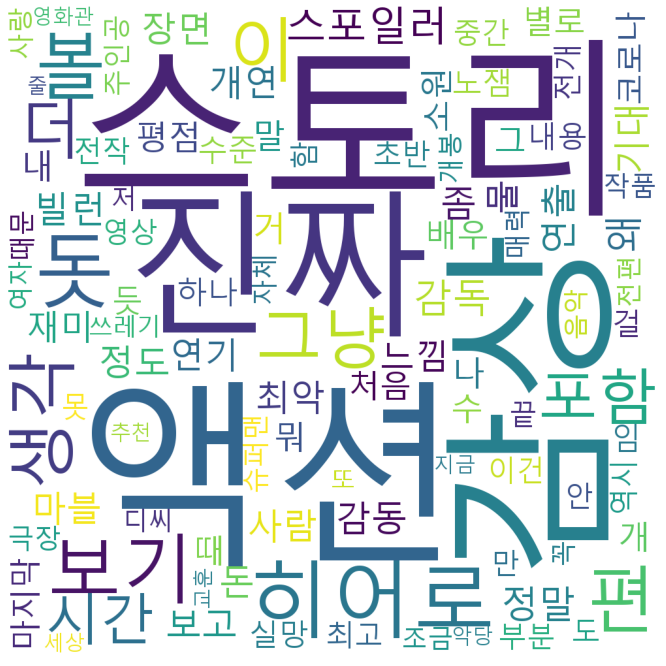

In [315]:
import matplotlib.pyplot as plt
rank_dic=dict(rank)
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", 
                      background_color="white", width=1000, height=1000,
                      max_words=100,max_font_size=300).generate_from_frequencies(rank_dic)

plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis("off")
plt.show()

### 그래프 그리기

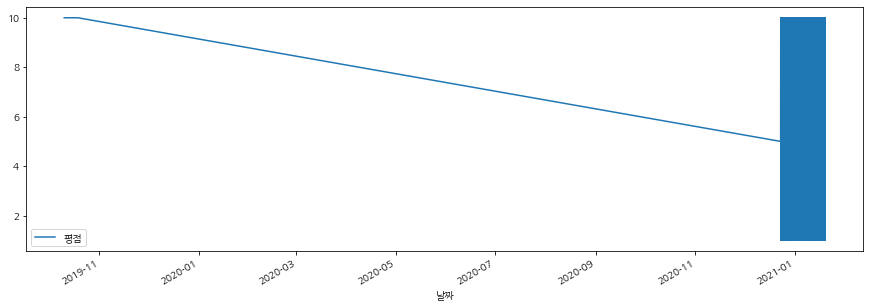

In [320]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

df.groupby('날짜').mean().plot(figsize=(15, 5))
plt.show()
